Notebook to read out data from wave gauges

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

/Applications/anaconda3/envs/mude/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [20]:
def plot_res(df, title):
    plt.figure(figsize=(10, 8))

    plt.subplot(3, 1, 1)
    plt.plot(df["6 [m]"], color='blue')
    plt.ylabel("Surface elevation [m]")
    plt.title(f'{title}, WG 6 [m]')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(df["7 [m]"], color='green')
    plt.ylabel("Surface elevation [m]")
    plt.title(f'{title}, WG 7 [m]')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(df["8 [m]"], color='red')
    plt.ylabel("Surface elevation [m]")
    plt.title(f'{title}, WG 8 [m]')
    plt.grid(True)

    plt.xlabel('Time')

    plt.tight_layout()

    plt.show()


In [21]:
def openfile(date, T, H, factor):
    df = pd.read_csv(
    f'DATA/{date}_T{T}_H{H}.ASC',
    sep=';',                   
    skiprows=8,              
    header=None,             
    decimal=',',             
    engine='python'
    )
    title = f"{date}_T{T}_H{H}"
    df = df.drop(df.columns[-1], axis=1)
    df.columns = ['Time', '6 [V]', '7 [V]', '8 [V]']


    df["6 [m]"] = df["6 [V]"] * factor[0]
    df["7 [m]"] = df["7 [V]"] * factor[1]
    df["8 [m]"] = df["8 [V]"] * factor[2]
    return df, title

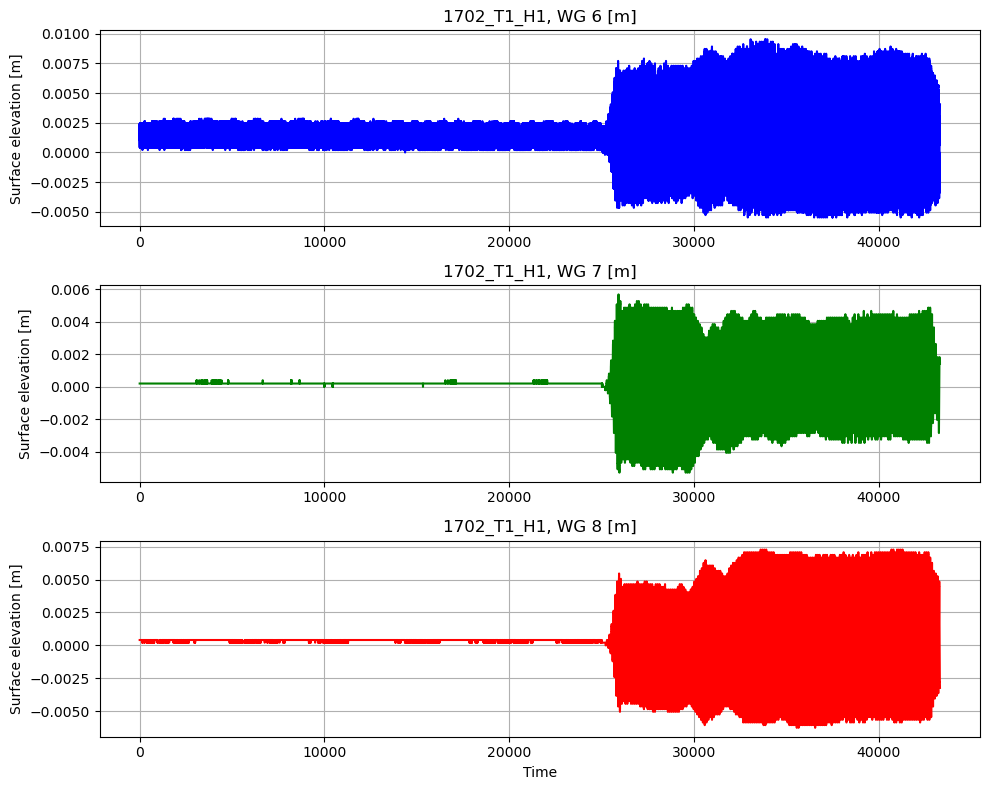

0


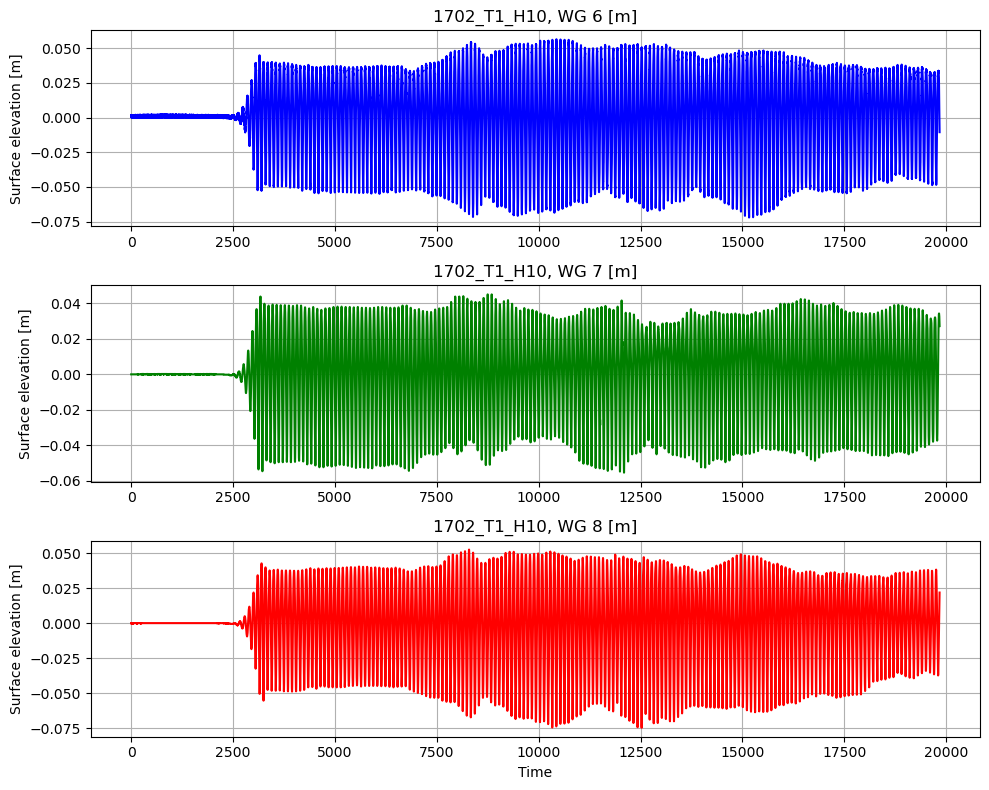

1


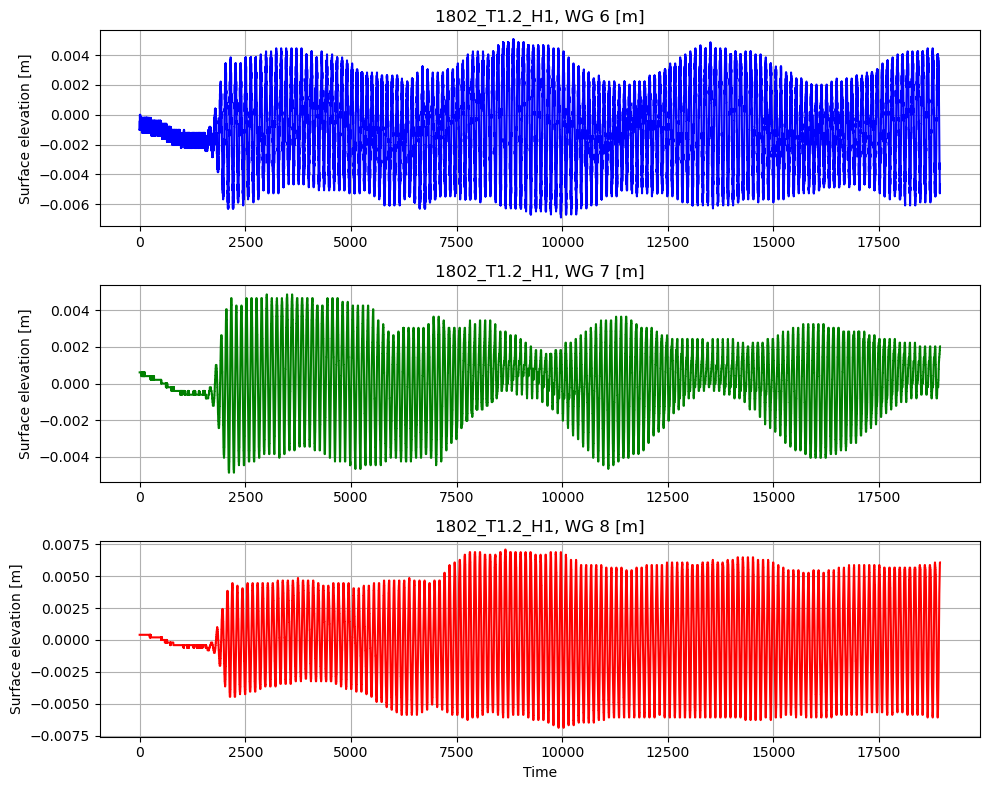

2


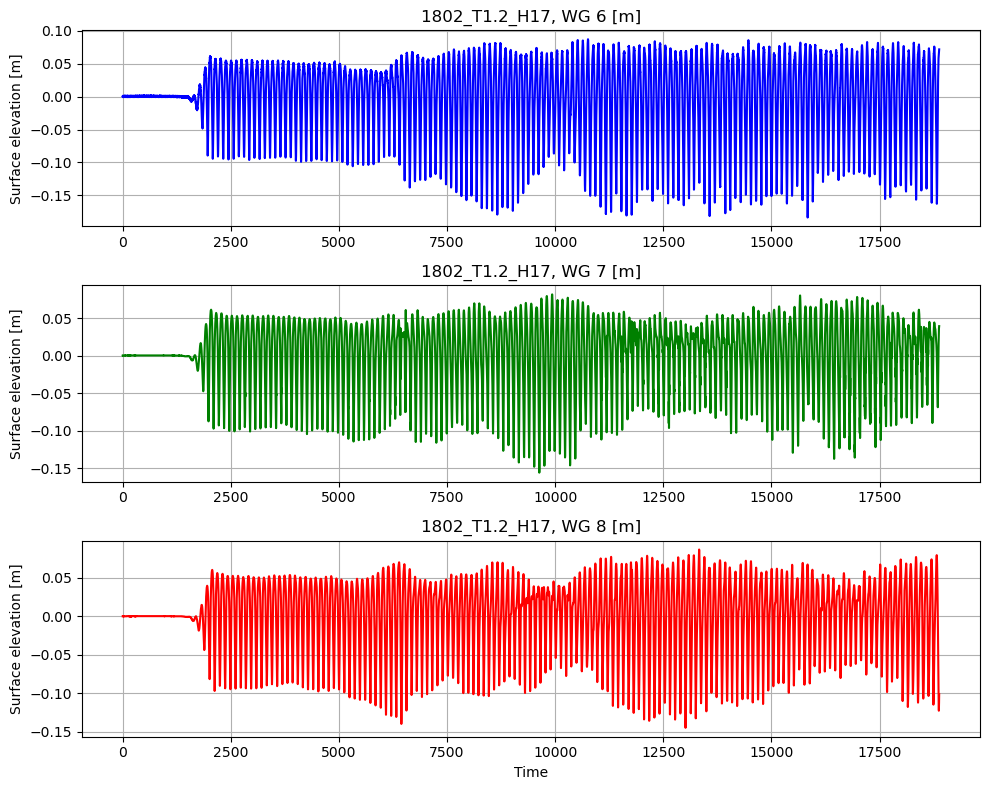

3


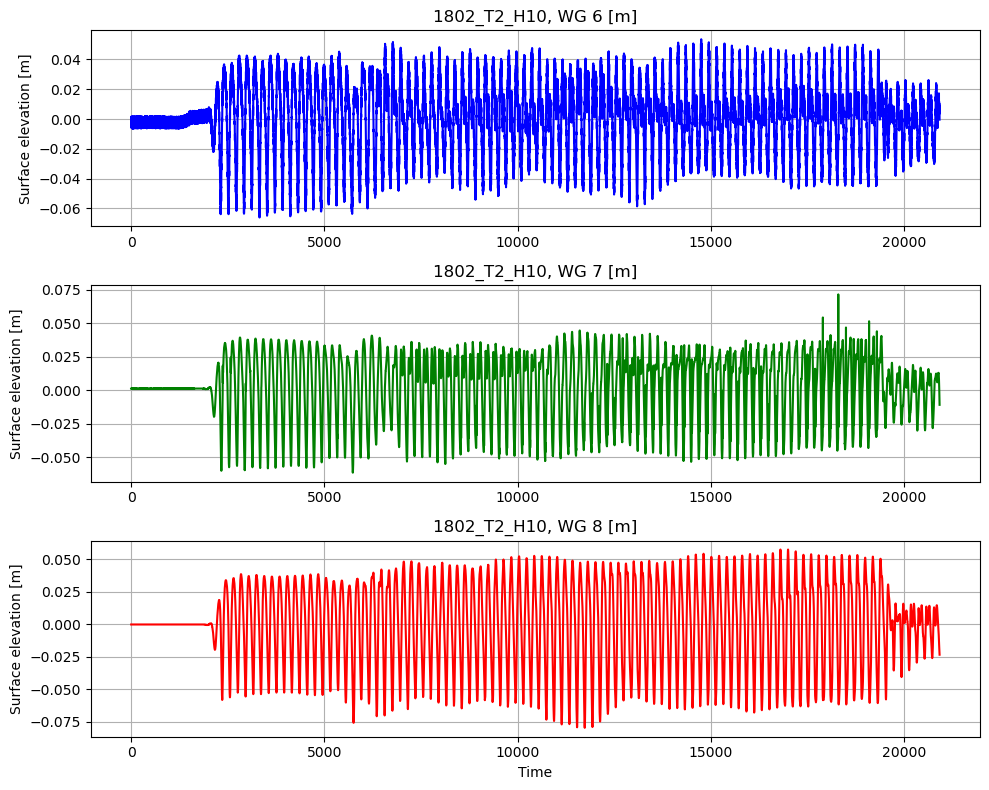

4


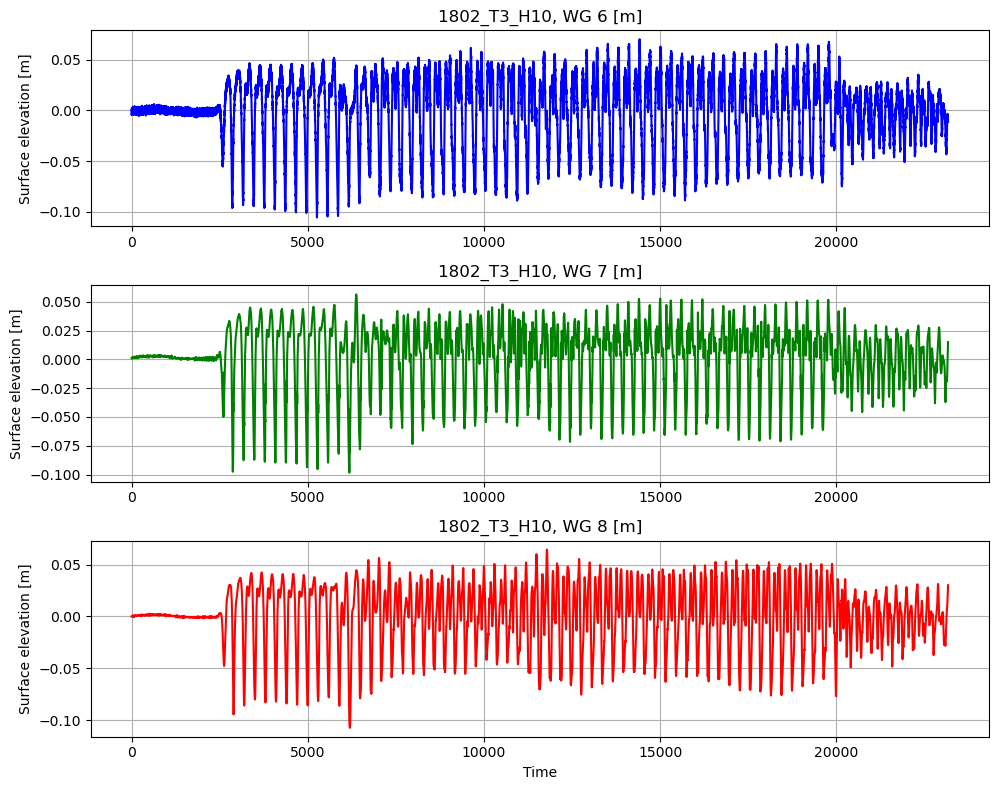

5


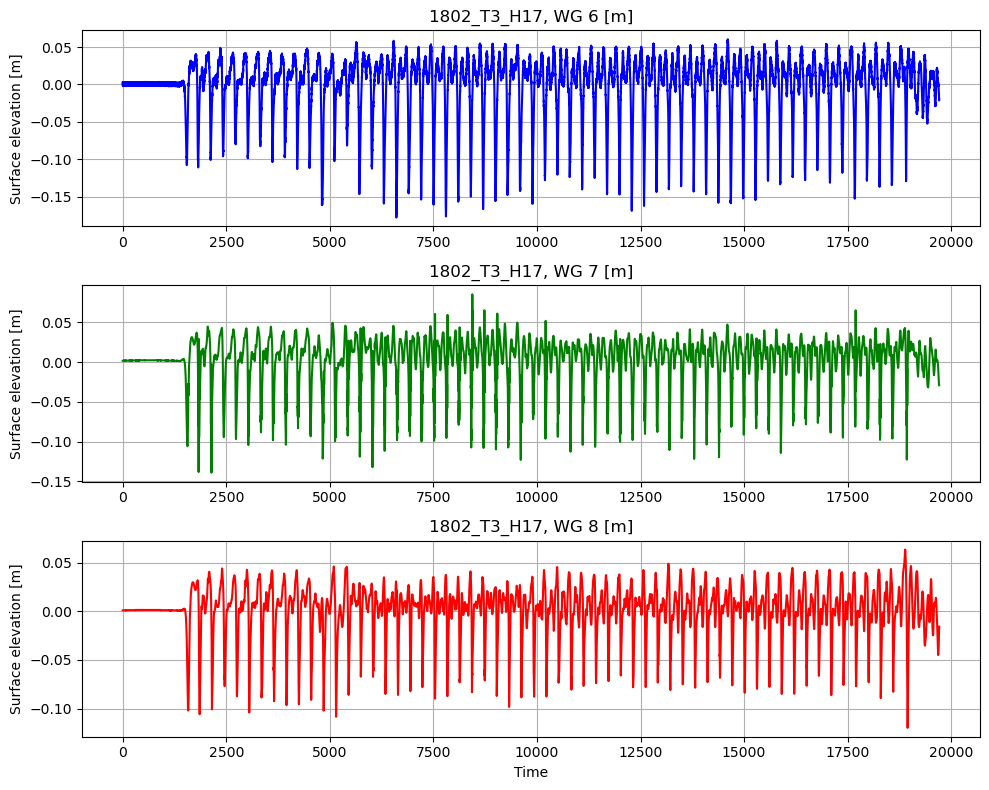

6


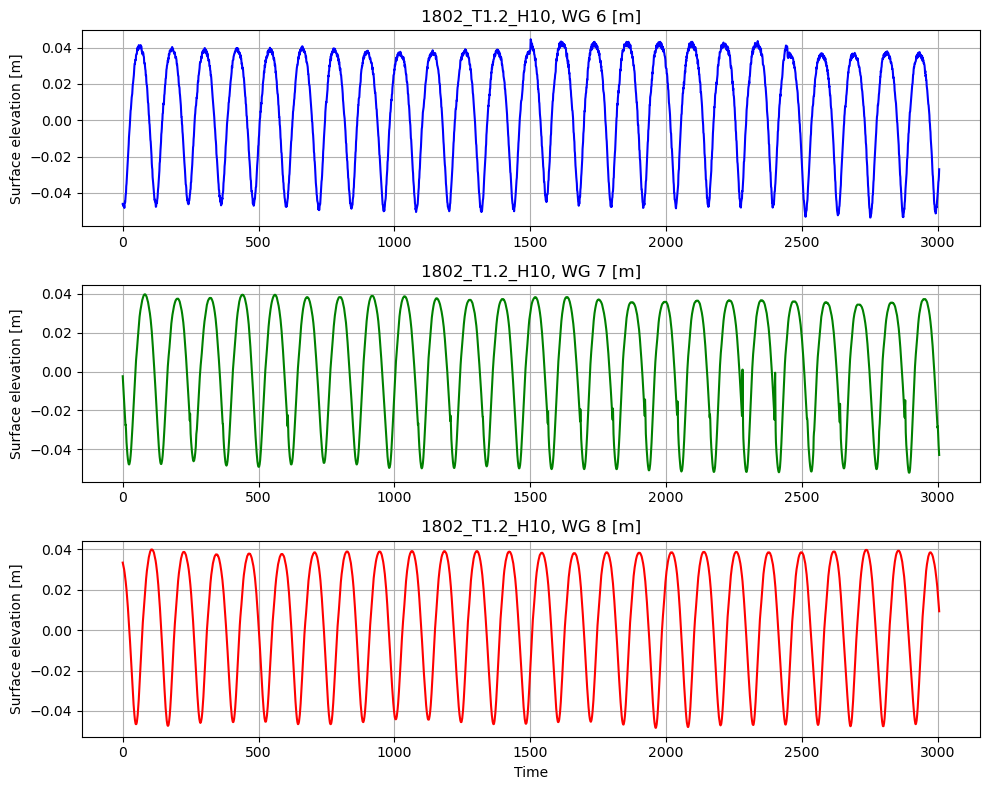

7


In [23]:
data = [(1702, 1, 1), (1702, 1, 10), (1802, 1.2, 1), (1802, 1.2, 17), (1802, 2, 10), (1802, 3, 10), (1802, 3, 17), (1802, 1.2, 10)]
factor = [-0.02028, -0.02028, -0.02023]


for i in range(len(data)):
    df, title = openfile(*data[i], factor)
    plot_res(df, title)
    print(i)